***FETCHING DATA***

In [3]:
import yfinance as yf
import pandas as pd

In [8]:
def fetch_financial_data(start='2015-01-01', end='2025-01-01'):
    tickers = {
        'SPX': '^GSPC',
        'GLD': 'GLD',
        'USO': 'USO',
        'SLV': 'SLV',
        'EUR/USD': 'EURUSD=X'
    }

    df_list = []

    for label, symbol in tickers.items():
        print(f"Downloading {label} ({symbol})...")
        data = yf.download(symbol, start=start, end=end)
        
        if data.empty:
            raise ValueError(f"No data returned for {label} ({symbol})")
        
        if 'Adj Close' not in data.columns:
            print(f"Warning: 'Adj Close' not found for {label}, trying 'Close' column instead.")
            if 'Close' in data.columns:
                data = data[['Close']].rename(columns={'Close': label})
            else:
                raise ValueError(f"No usable price column found for {label} ({symbol})")
        else:
            data = data[['Adj Close']].rename(columns={'Adj Close': label})
        
        df_list.append(data)

    combined_df = pd.concat(df_list, axis=1)
    combined_df.dropna(inplace=True)
    combined_df.reset_index(inplace=True)

    return combined_df

In [9]:
df = fetch_financial_data(start='2015-01-01', end='2025-01-01')

C:\Users\User\AppData\Local\Temp\ipykernel_22400\2654868240.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


C:\Users\User\AppData\Local\Temp\ipykernel_22400\2654868240.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_22400\2654868240.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_22400\2654868240.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_22400\2654868240.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start, end=end)


[*********************100%***********************]  1 of 1 completed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   (Date, )             2513 non-null   datetime64[ns]
 1   (SPX, ^GSPC)         2513 non-null   float64       
 2   (GLD, GLD)           2513 non-null   float64       
 3   (USO, USO)           2513 non-null   float64       
 4   (SLV, SLV)           2513 non-null   float64       
 5   (EUR/USD, EURUSD=X)  2513 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.9 KB


In [11]:
df.head()

Price,Date,SPX,GLD,USO,SLV,EUR/USD
Ticker,,^GSPC,GLD,USO,SLV,EURUSD=X
0,2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941
1,2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643
2,2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902
3,2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536
4,2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600


In [12]:
df.isnull().sum()


Price    Ticker  
Date                 0
SPX      ^GSPC       0
GLD      GLD         0
USO      USO         0
SLV      SLV         0
EUR/USD  EURUSD=X    0
dtype: int64

In [13]:
path = r'C:\Users\User\dev\training_model\dataset\financial_data.csv'
df.to_csv(path, index=False)

In [15]:
path = r'C:\Users\User\dev\training_model\dataset\financial_data.csv'
df = pd.read_csv(path, skiprows=1)
df.head()

,Unnamed: 0,^GSPC,GLD,USO,SLV,EURUSD=X
0,2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941
1,2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643
2,2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902
3,2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536
4,2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600


In [ ]:
df['Date'] = df['Unnamed: 0']


,Unnamed: 0,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [18]:
df.drop(columns=['Unnamed: 0'])
df.head()

,Unnamed: 0,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2015-01-02,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2015-01-05,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2015-01-06,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2015-01-07,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2015-01-08,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [19]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [20]:
df.head()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [21]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df.to_csv(path, index=False)

In [22]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df = pd.read_csv(path)
df.head()

,^GSPC,GLD,USO,SLV,EURUSD=X,Date
0,2058.199951,114.080002,159.119995,15.11,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,15.50,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,15.83,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,15.85,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,15.64,1.183600,2015-01-08


In [23]:
df.isna().sum().sort_values(ascending=False)

^GSPC       0
GLD         0
USO         0
SLV         0
EURUSD=X    0
Date        0
dtype: int64

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

**Data analysis**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
correlation  = df.corr()

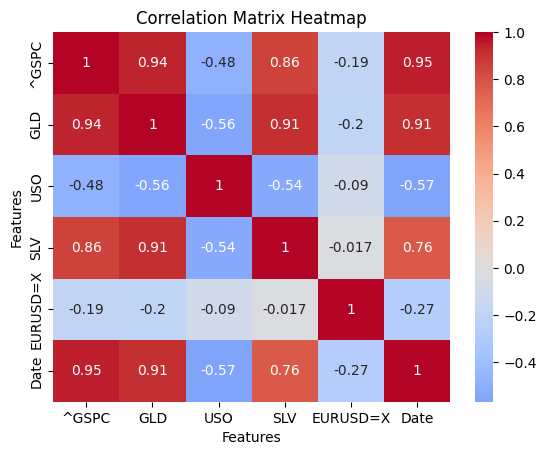

In [28]:
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [29]:
df = df.drop(columns=['SLV'])

In [30]:
df.head()

,^GSPC,GLD,USO,EURUSD=X,Date
0,2058.199951,114.080002,159.119995,1.208941,2015-01-02
1,2020.579956,115.800003,150.320007,1.194643,2015-01-05
2,2002.609985,117.120003,144.399994,1.193902,2015-01-06
3,2025.900024,116.430000,146.960007,1.187536,2015-01-07
4,2062.139893,115.940002,148.399994,1.183600,2015-01-08


In [31]:
df.set_index("Date", inplace=True)

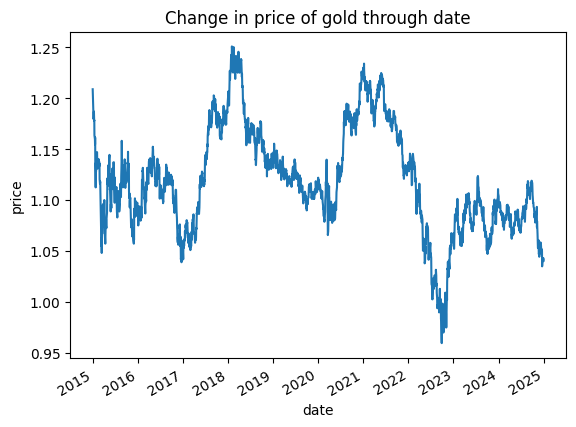

In [35]:
df["EURUSD=X"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

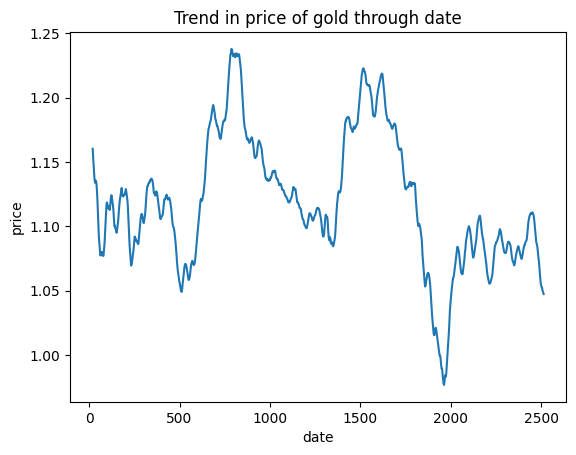

In [36]:
df["price_trend"] = df["EURUSD=X"].rolling(window=20).mean()

df.reset_index("Date", inplace=True)

df["price_trend"].loc[20:].plot()

plt.title("Trend in price of gold through date")

plt.xlabel("date")
plt.ylabel("price")
plt.show()

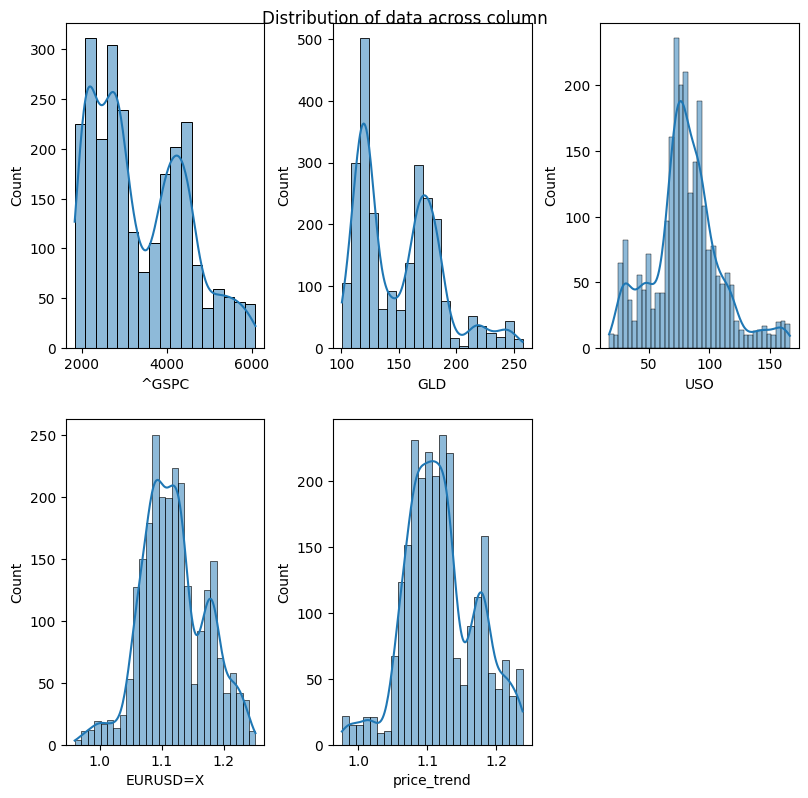

In [37]:
fig = plt.figure(figsize=(8, 8))

fig.suptitle('Distribution of data across column')
temp = df.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [38]:
print(df.drop("Date", axis=1).skew(axis=0, skipna=True))

^GSPC          0.536644
GLD            0.730849
USO            0.388240
EURUSD=X       0.109580
price_trend    0.135199
dtype: float64


In [40]:
df["USO"] = df["USO"].apply(lambda x: np.sqrt(x))

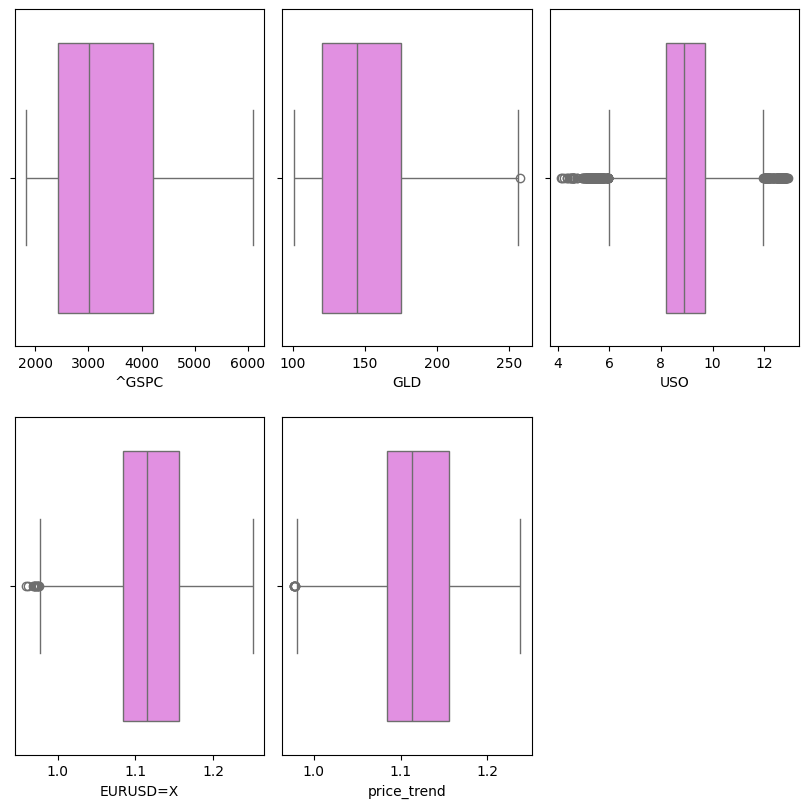

In [41]:
fig = plt.figure(figsize=(8, 8))
temp = df.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [42]:
def outlier_removal(column):
    upper_limit = column.quantile(.95)
    lower_limit = column.quantile(.05)
    column.loc[(column > upper_limit)] = upper_limit
    column.loc[(column < lower_limit)] = lower_limit
    return column

In [44]:
df[['^GSPC', 'GLD', 'USO', 'EURUSD=X']] = df[['^GSPC', 'GLD', 'USO', 'EURUSD=X']].apply(outlier_removal)

**Modelin the data**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [49]:
X = df.drop(['Date', 'EURUSD=X'], axis=1)

y = df['EURUSD=X']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
imputer = SimpleImputer(strategy='mean') 


x_train_scaled = imputer.fit_transform(x_train_scaled)
x_test_scaled = imputer.transform(x_test_scaled)

poly = PolynomialFeatures(degree=2)
lasso = Lasso()


param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2,
							1e-1, 1, 5, 10, 
							20, 30, 40]}


pipeline = make_pipeline(poly, lasso)


lasso_grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=3)
lasso_grid_search.fit(x_train_scaled, y_train)


y_pred = lasso_grid_search.predict(x_train_scaled)

r2 = r2_score(y_train, y_pred)


print("R-squared: ", r2)
print('Best parameter values: ', lasso_grid_search.best_params_)
print('Best score: ', lasso_grid_search.best_score_)

R-squared:  0.9217671299502681
Best parameter values:  {'lasso__alpha': 0.0001}
Best score:  0.92092878270504


In [55]:
param_grid = {'n_estimators': [50, 80, 100], 'max_depth': [3, 5, 7]}

rf = RandomForestRegressor()

rf_grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=2)

rf_grid_search.fit(x_train_scaled, y_train)

print('Best parameter values: ', rf_grid_search.best_params_)
print('Best score: ', rf_grid_search.best_score_)

Best parameter values:  {'max_depth': 7, 'n_estimators': 50}
Best score:  0.951522815375376
